In [47]:
# load the relevant package
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# basic data check

In [30]:
# check missing value 
# there is no missing value in the data set
# check data type of different feature
data = pd.read_csv('HireArt - Data Analyst Exercise.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
Account manager    1001 non-null object
Client Name        1001 non-null object
Date of Contact    1001 non-null object
dtypes: object(3)
memory usage: 23.5+ KB


# add new feature

In [45]:
# convert the 'Date of Contact' from str to datetype in pandas
data['Date of Contact'] = pd.to_datetime(data['Date of Contact'])

# add year feature
data['year'] = data['Date of Contact'].dt.year

# add month feature
data['month'] = data['Date of Contact'].dt.month

# add the number of clients 
# split client name by ',' 'and'
data['num'] = data['Client Name'].str.replace(' and',',').str.split(', ').apply(len)

data.head()

,Account manager,Client Name,Date of Contact,year,month,num
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015,10,3
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013,12,3
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013,12,3
3,Milan Crona,Armstrong Group,2013-11-02,2013,11,1
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013,12,3


In [77]:
# check the start date and end of date

print(data['Date of Contact'].min())
print(data['Date of Contact'].max())

2013-10-03 00:00:00
2017-09-29 00:00:00


- the start date is start of October, the end date is end of September
- So I think I need not to manipulate the range of date data

# visualization

## general group by month

### group by records

In [86]:
groupbymonth = data.groupby('month').size().reset_index().rename(columns={0: 'count by month'})
groupbymonth['count by month'] = groupbymonth['count by month']/groupbymonth['count by month'].sum()
groupbymonth

,month,count by month
0,1,0.059940
1,2,0.063936
2,3,0.057942
3,4,0.051948
4,5,0.068931
5,6,0.076923
6,7,0.065934
7,8,0.078921
8,9,0.120879
9,10,0.212787


### group by client number

In [89]:
groupbyclientnum = data.groupby('month')['num'].sum().reset_index().rename(columns={'num': 'count by client num'})
groupbyclientnum['count by client num'] = groupbyclientnum ['count by client num']/groupbyclientnum ['count by client num'].sum()
groupbyclientnum

,month,count by client num
0,1,0.056460
1,2,0.057986
2,3,0.052899
3,4,0.058494
4,5,0.071719
5,6,0.075280
6,7,0.066633
7,8,0.082909
8,9,0.126144
9,10,0.215666


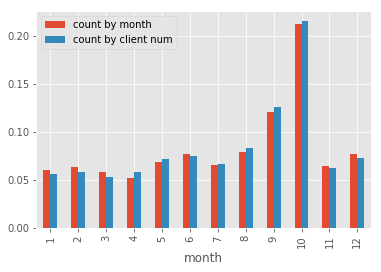

In [93]:
monthdata = pd.merge(groupbymonth, groupbyclientnum, on='month')
monthdata.plot(x='month', y=['count by month', 'count by client num'], kind="bar")

- from the plot we can see 
- no matter what kind of defination of client number
- clients number reach peak in October

## check the trend by year

In [111]:
groupbyyear = data.groupby(['year','month']).size()
groupbyyearsum = data.groupby('year').size()

# normalize data
group = groupbyyear.div(groupbyyearsum).unstack()

In [112]:
group

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.606061,0.191919,0.202020
2014,0.049242,0.045455,0.045455,0.045455,0.068182,0.087121,0.079545,0.094697,0.125000,0.219697,0.068182,0.071970
2015,0.055777,0.079681,0.055777,0.059761,0.071713,0.063745,0.079681,0.079681,0.115538,0.211155,0.063745,0.063745
2016,0.087500,0.075000,0.079167,0.054167,0.070833,0.091667,0.045833,0.062500,0.116667,0.175000,0.050000,0.091667
2017,0.081633,0.095238,0.088435,0.081633,0.108844,0.108844,0.095238,0.129252,0.210884,NaN,NaN,NaN


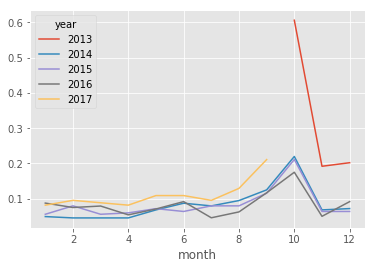

In [116]:
group.iloc[:,:].transpose().plot()

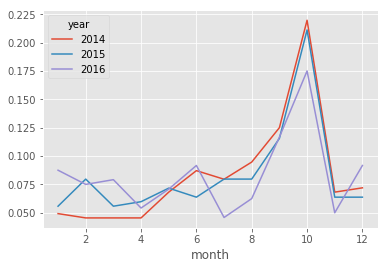

In [117]:
group.iloc[1:4,:].transpose().plot()

- from the scatter plot I find the number of client is increasing from start of year
- to October then decreasing